In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import os
os.chdir('/Users/sebas/projects/metabolomics')
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

In [21]:
import matplotlib.pyplot as plt
import dill

In [22]:
ls ./notebooks/discovery_search/results

all_tanimoto_ms2deepscore.pkl
modified_cosine_casmi_NEURIPS_results_analog_discovery_unknwon_compounds.pkl
modified_cosine_casmi_results_analog_discovery_unknwon_compounds.pkl
modified_cosine_results_analog_discovery_unknwon_compounds.pkl
ms2deepscore_casmi_NEURIPS_results_analog_discovery_unknwon_compounds.pkl
ms2deepscore_casmi_results_analog_discovery_unknwon_compounds.pkl
ms2deepscore_results_analog_discovery_unknwon_compounds.pkl
ms2deepscore_v2_casmi_NEURIPS_results_analog_discovery_unknwon_compounds.pkl
simba_100_million_results_analog_discovery_unknwon_compounds.pkl
simba_150_millions_results_analog_discovery_unknwon_compounds.pkl
simba_2_results_analog_discovery_unknwon_compounds.pkl
simba_EDIT_DISTANCE_MCES20_NEURIPS_20241115_results_analog_discovery_unknwon_compounds.pkl
simba_EDIT_DISTANCE_MCES20_NEURIPS_precursor_randomized_results_analog_discovery_unknwon_compounds.pkl
simba_EDIT_DISTANCE_MCES20_NEURIPS_results_analog_discovery_unknwon_compounds.pkl
simba_EDIT_DISTANCE_MC

In [23]:
format_file_unknown = "./notebooks/discovery_search/results/{}_results_analog_discovery_unknwon_compounds.pkl"
format_file_rankings = "./notebooks/discovery_search/results/{}_results_analog_discovery_ranking.pkl"

In [24]:
similarity_names= [#'tanimoto_similarity',
                   #'spec2vec',
                   #'spec2vec_no_preprocessing',
                   #'simba',
                   #'simba_100_million',
                   #'simba_more_epochs_day3',
                   #'simba_EDIT_DISTANCE',
                   # 'simba_EDIT_DISTANCE_WITH_CONFIDENCE',
                   
                   #'simba_EDIT_DISTANCE_PRETRAINING_WITHOUT_CONFIDENCE'
                   #'simba_improved',
                   #'simba_resampled_20240530_from_scratch',
                   #'simba_resampled_20240530',
                   #'simba_150_millions',
                   # 'simba_new_preprocessing',
                   #'simba_exhaustive_128n',
                   #'simba_exhaustive_sampled_128n',
                   #'simba_exhaustive_sampled_128n_with_pretrained',
                   #'simba_exhaustive_sampled_128n_20240617',
                   #'simba_combination_models',
                   #'simba_exhaustive_sampled_128n_20240618',
                   #'ms2deepscore',
                   #'modified_cosine',
                   #'tanimoto_similarity_casmi',
                   #'spec2vec_casmi',
                   'tanimoto_similarity_casmi_NEURIPS',
                    
                   # 'ms2deepscore_casmi',
                    #'simba_EDIT_DISTANCE_MCES20',
                    'modified_cosine_casmi_NEURIPS',
                    'ms2deepscore_v2_casmi_NEURIPS',
                    'spec2vec_casmi_NEURIPS',
                    #'simba_EDIT_DISTANCE_MCES20_NEURIPS',
                    'simba_generated_data_20250126',
                   #'simba_casmi_more_epochs_day3',
                   # 'simba_EDIT_DISTANCE_PRETRAINING',
                   # 'simba_casmi_new_preprocessing',
                   # 
                   #'simba_no_sim1_10millions',
                   #'simba_pretrain_low_range',
                   #'simba_2',
                   #'simba_not_bin_sim_1_10_million',
                   #'simba_no_identity',
                   ]

## unknown compounds

In [25]:
results_unknown={}
for s in similarity_names:
    file_path = format_file_unknown.format(s)
    with open(file_path, 'rb') as f:
        results_unknown[s] = dill.load(f)

In [26]:
## plot mces

In [27]:
# Create a box plot
tani_list=[]
mces_list=[]
labels_list=[]
for s in similarity_names:
    labels_list.append(s)
    #tani= [m for m in results_unknown[s]['tanimoto_retrieved'] if m is not None]
    mces= [m for m in results_unknown[s]['mces_retrieved'] if m is not None]
    #tani_list.append(tani)
    mces_list.append(mces)

In [28]:
#len(tani_list[0])

In [29]:
#plt.figure(figsize=(12,5))
#plt.boxplot(tani_list, labels=similarity_names)
#plt.boxplot(tani_list, labels=['tanimoto', 'spec2vec', 'simba_previous','simba_multitasking'])
#plt.boxplot(mces_list, labels=['tanimoto', 'spec2vec', 'ms2deepscore','simba'])
#plt.boxplot(, labels=labels_list)
#plt.ylim([0,1.1])
#plt.ylabel('Tanimoto Similarity')
#plt.title('')
#plt.grid()

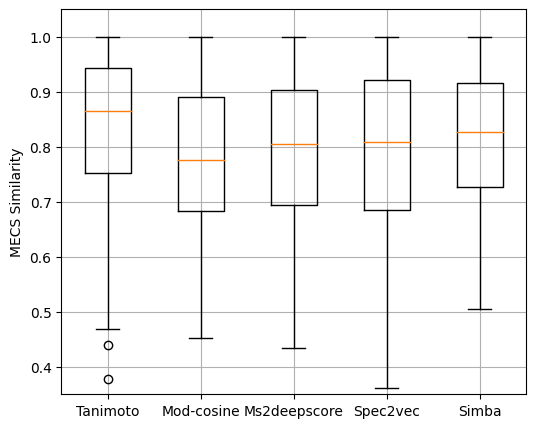

In [30]:
plt.figure(figsize=(6,5))
#plt.boxplot(mces_list, labels=similarity_names)
plt.boxplot(mces_list, labels=['Tanimoto', 'Mod-cosine', 'Ms2deepscore','Spec2vec','Simba',])
plt.ylim([0.35,1.05])
plt.ylabel('MECS Similarity')
plt.title('')
plt.grid()

In [31]:
from scipy import stats



# Perform t-test
t_stat, p_value = stats.ttest_ind(mces_list[0], mces_list[1])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 3.030234799615245
P-value: 0.0026881184147524687


In [32]:
import numpy as np
np.median(mces_list[3])

0.8094909045965776

In [33]:
from scipy import stats

# Sample data
X = mces_list[1] # Replace with your actual data
Y = mces_list[3] 

# Perform Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(X, Y)

print(f"U-statistic: {u_stat}, P-value: {p_value}")

U-statistic: 7819.0, P-value: 0.1501778822311878


In [34]:
import numpy as np
np.median(mces_list[2] )

0.8056561213190768

In [35]:
from scipy import stats

# Sample data
X = mces_list[1] # Replace with your actual data
Y = mces_list[3] 

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(X, Y)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.8248950663959229, P-value: 0.4101815578317204


## Rankings

In [36]:
results_rankings={}
for s in similarity_names:
    file_path = format_file_rankings.format(s)
    with open(file_path, 'rb') as f:
        results_rankings[s] = dill.load(f)

FileNotFoundError: [Errno 2] No such file or directory: './notebooks/discovery_search/results/tanimoto_similarity_casmi_NEURIPS_results_analog_discovery_ranking.pkl'

In [ ]:
for s in similarity_names:
    plt.plot(results_rankings[s]['rankings_x'], results_rankings[s]['rankings_y'], marker='*', label=s)
plt.xlabel('k')
plt.ylabel('accuracy')
#plt.ylim([0,1])
plt.grid()
plt.legend()

In [ ]:
68303299801**0.5

In [ ]:
import numpy as np
a=np.zeros((3, 3), dtype=np.float16)

In [ ]:
a

In [ ]:
a[0,0]=1

In [ ]:
a

In [ ]:
a[1,1]=666

In [ ]:
a

In [ ]:
from torch.utils.data import WeightedRandomSampler

weights_tr = [0.1, 0.2, 0.3, 0.4]  # Some weights

train_sampler = WeightedRandomSampler(
    weights=weights_tr, num_samples=3, replacement=True
)

# Now, if you delete weights_tr
del weights_tr

# It will not affect train_sampler
for index in train_sampler:
    print(index)

In [ ]:
freq=[192235192,
381735986,
191719062,
71400948,
25104550,
7324840,
1996170,
635518,
265134,
194200]
import numpy as np
ranges= np.arange(0,10)

In [ ]:
#ranges=ranges*0.1

In [ ]:
plt.bar(ranges, freq)
plt.xlabel('bin')
plt.grid()
plt.ylabel('freq')